# Simple Linear Regression

* 선형회귀  최소제곱추정법의 Loss_Fucntion을 직접 구현해보기 
* 구현한 결과를 `sklearn`의 반환값과 비교해보기 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
x = np.arange(1,30,1,dtype = np.int16)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int16)

In [18]:
y = 2*x + 1
y

# Random Normal Distribution
y_random = y + np.random.normal(loc = 0, scale = 8 , size = len(y))  # location  = 0 , sta = 8  
y_random

array([-10.22406365,   4.12800259,   7.55968155,  16.16012052,
         3.29790979,  16.03246156,   6.27664086,  23.4472299 ,
        19.25819473,  16.46589217,  31.12573442,  13.89857975,
        35.71119525,  30.56621783,  40.50449049,  30.71386538,
        27.8633732 ,  25.12169442,  32.05750377,  44.58083399,
        31.37383174,  36.57414409,  49.47223494,  58.80118812,
        56.54798789,  39.99139556,  44.1233851 ,  50.26133161,
        57.68540812])

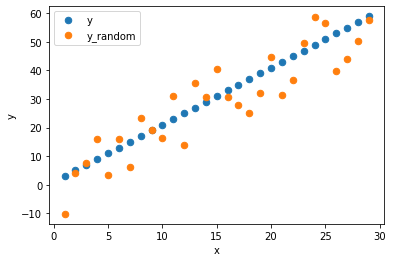

In [20]:
plt.plot(x,y,'.',markersize = 13,label = 'y')
plt.plot(x,y_random,'.',markersize = 13,label = 'y_random')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Parameter Estimation

### y_random을 실제 데이터라 생각하고 target 찾기 

$\beta_1 = \frac{S_{xy}}{S_{xx}}$  

$\beta_0 = \overline{y} - \beta_1\overline{x}$


In [26]:
Sxy = (x - np.mean(x)) * (y_random - np.mean(y_random))
Sxx = (x - np.mean(x)) ** 2

Sxy = Sxy.sum()
Sxx = Sxx.sum()

print(f'Sxy: {Sxy}\nSxx : {Sxx} ')

beta_1 = Sxy / Sxx
beta_0 = np.mean(y_random) - beta_1*np.mean(x)

print(f'beta_0 : {beta_0.round(3)}\nbeta_1 : {beta_1.round(3)}')

Sxy: 3841.363778088995
Sxx : 2030.0 
beta_0 : 0.56
beta_1 : 1.892


# Visualization Estimation

* 대부분의 경우 target을 알 수 없다 

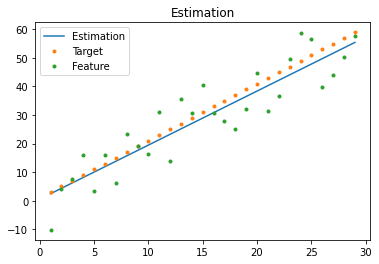

In [36]:
Result = beta_1 * x + beta_0

plt.plot(x,Result,label = 'Estimation')
plt.plot(x,y,'.',label = 'Target')
plt.plot(x,y_random,'.',label = 'Feature')
plt.title("Estimation")
plt.legend()
plt.show()

### Random의 값이 모두 다르기 때문에 seed값을 주어서 똑같이 확인해보기

In [37]:
np.random.seed(1013)
seed_y_random = y + np.random.normal(loc = 0, scale = 8 , size = len(y))  # location  = 0 , sta = 8  

seed_Sxy = (x - np.mean(x)) * (seed_y_random - np.mean(seed_y_random))
seed_Sxx = (x - np.mean(x)) ** 2

seed_Sxy = seed_Sxy.sum()
seed_Sxx = seed_Sxx.sum()

print(f'seed_Sxy: {seed_Sxy}\nseed_Sxx : {seed_Sxx} ')

seed_beta_1 = seed_Sxy / seed_Sxx
seed_beta_0 = np.mean(seed_y_random) - seed_beta_1*np.mean(x)

print(f'beta_0 : {seed_beta_0.round(3)}\nbeta_1 : {seed_beta_1.round(3)}')


seed_Sxy: 4081.0757749214436
seed_Sxx : 2030.0 
beta_0 : 1.031
beta_1 : 2.01


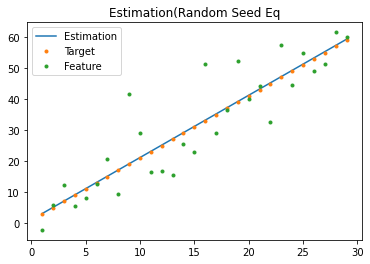

In [39]:
seed_Result = seed_beta_1 * x + seed_beta_0

plt.plot(x,seed_Result,label = 'Estimation')
plt.plot(x,y,'.',label = 'Target')
plt.plot(x,seed_y_random,'.',label = 'Feature')
plt.title("Estimation(Random Seed Eq")
plt.legend()
plt.show()

# Sklearn을 활용해서 앞서 구현한 결과와 비교해보기

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # 객체 생성

In [42]:
x_2d =x.reshape(-1,1) # x의 demention을 2d로 변경
print(np.shape(x), np.shape(x_2d))

(29,) (29, 1)


# model 에 값을 넣어서 값 확인

* sklearn 모듈을 사용해서 쉽게 Estimation  가능

`LinearRegression.coef_ ` = $\beta_1$  
`LinearRegression.intercept_` = $\beta_0$

In [53]:
lr.fit(x_2d, seed_y_random)
print(f'coef : {lr.coef_} \nbefore_beta_1 : {seed_beta_1}\n\nintercept : {lr.intercept_}\nbefore_beta_0 : {seed_beta_0}')


coef : [2.01038216] 
before_beta_1 : 2.010382155133716

intercept : 1.0308305920375211
before_beta_0 : 1.0308305920375282
